In [1]:
%load_ext Cython

In [2]:
from scipy.misc import imread
import matplotlib.pyplot as plt
import array

In [18]:
image = imread("b0.jpeg", mode='L')
print(type(image))
print(type(image[0][0]))
image1 = image.astype(int)
print(type(image1))
print(type(image1[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [ ]:
%%cython
def my_function(long[:,:] my_array):
    print(my_array)

In [ ]:
my_function(image1)

In [9]:
%%cython
#Esta es una función análoga a pyl.where
def my_imbin(long[:,:]image, limit):
    cdef int ni, nj
    ni = image.shape[0]
    nj = image.shape[1]
    for i in range(ni):
        for j in range(nj):
            if(image[i][j] > limit):
                image[i][j] = 255
            else:
                image[i][j] = 0
    return image

<MemoryView of 'ndarray' object>


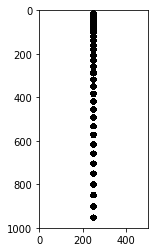

In [19]:
the_image = my_imbin(image1,200)
print(the_image)
plt.imshow(the_image, cmap='gray')
plt.show()

In [ ]:
%%cython
def count_bw(long[:,:] image, int[:] contador):
    cdef int ni, nj
    ni = image.shape[0]
    nj = image.shape[1]
    for i in range(ni):
        for j in range(nj):
            if(image[i,j] == 0):
                contador[0] += 1
            else:
                contador[1] += 1
    return contador[0], contador[1]

In [ ]:
contador = array.array('i',[0,0])
print(count_bw(the_image, contador))

In [20]:
%%cython 
def my_labels(long[:,:] image):
    cdef int ni, nj
    ni = image.shape[0]
    nj = image.shape[1]
    cdef int label = 1
    cdef list revisor = [[],[]]
    revisor[0].append(label)
    print(revisor)
    for i in range(ni):
        revisor[1].append(0)
        for j in range(nj):
            #print(image[i,j])
            if(image[i,j] == 0):
                image[i,j] = label
                revisor[1][i] += 1
                #print(revisor)
                #print("hey")
            else:
                image[i,j] = 0
        if(revisor[0][i-1] == revisor[0][i] and revisor[1][i] == 0):
            revisor[0].append(label)
            label += 1
        else:
            revisor[0].append(0)
    print(revisor)
    return image, label

[[1], []]
[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

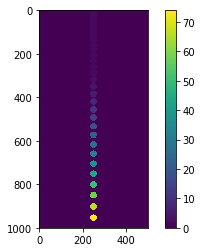

In [21]:
image2, number = my_labels(the_image)
print(number)
plt.imshow(image2)
plt.colorbar()
plt.show()
print()

In [22]:
print(image2)

<MemoryView of '_memoryviewslice' object>
